In [1]:
import yfinance as yf

In [2]:
sp500 = yf.Ticker('^GSPC')

In [3]:
sp500 = sp500.history(period='max')

<Axes: xlabel='Date'>

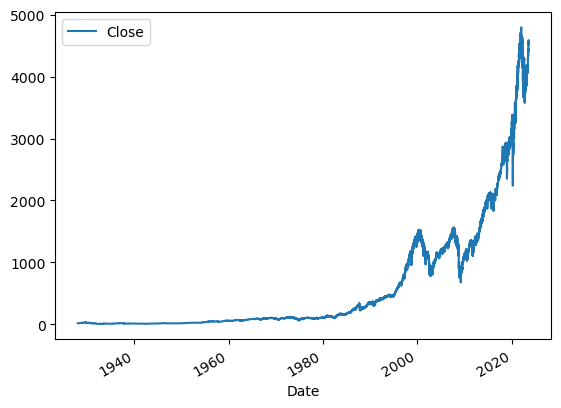

In [4]:
sp500.plot.line(y='Close', use_index=True)

In [5]:
del sp500['Dividends']
del sp500['Stock Splits']

In [6]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-07-27 00:00:00-04:00,4598.259766,4607.069824,4528.560059,4537.410156,4553210000
2023-07-28 00:00:00-04:00,4565.750000,4590.160156,4564.009766,4582.229980,3981010000
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000


In [7]:
sp500['Tomorrow'] = sp500['Close'].shift(-1)

In [8]:
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-07-27 00:00:00-04:00,4598.259766,4607.069824,4528.560059,4537.410156,4553210000,4582.229980,1
2023-07-28 00:00:00-04:00,4565.750000,4590.160156,4564.009766,4582.229980,3981010000,4588.959961,1
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000,4576.729980,0


In [10]:
sp500 = sp500.loc['1990-01-01 00:00:00-00:00':].copy()

In [17]:
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

In [61]:
X_train = train.drop(['Tomorrow','Target'], axis=1)
y_train = train['Target']

In [62]:
X_test = test.drop(['Tomorrow','Target'], axis=1)
y_test = test['Target']

In [26]:
predictors = ['Open', 'High', 'Low', 'Close', 'Volume']

In [27]:
import torch
from torch import nn

In [63]:
X_train_t = torch.tensor(X_train.values).type(torch.float32)
y_train_t = torch.tensor(y_train).type(torch.float32)
X_test_t = torch.tensor(X_test.values).type(torch.float32)
y_test_t = torch.tensor(y_test).type(torch.float32)

In [64]:
X_train_t.size(), X_test_t.size()

(torch.Size([8361, 5]), torch.Size([100, 5]))

In [65]:
y_train_t = y_train_t.unsqueeze(dim=1)
y_test_t = y_test_t.unsqueeze(dim=1)

In [228]:
class Finance(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer_1 = nn.Linear(in_features=5, out_features=256)
        self.layer_2 = nn.Linear(in_features=256, out_features=1256)
        self.layer_3 = nn.Linear(in_features=1256, out_features=1)
#         self.layer_4 = nn.Linear(in_features=10, out_features=5)
#         self.layer_5 = nn.Linear(in_features=5, out_features=1)
        self.relu = nn.ReLU() # relu is a non-linear activation function
        self.tanh = nn.Tanh()
    def forward(self, x):
    # Where should we put our non-linear activation functions?
        return self.layer_3(self.tanh(self.layer_2(self.tanh(self.layer_1(x)))))
#         return self.layer_5(self.relu(self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))))

In [229]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() 
    acc = (correct/len(y_pred)) * 100
    return acc

In [230]:
my_model = Finance()

In [231]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(my_model.parameters(), 
                            lr=0.01)

In [232]:
# Loop through data
epochs = 1001

for epoch in range(epochs):
    ### Training
    my_model.train()

    # 1. Forward pass
    x_logits = my_model(X_train_t)
    x_pred = torch.round(torch.sigmoid(x_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate the loss
    loss = loss_fn(x_logits, y_train_t, ) # BCEWithLogitsLoss (takes in logits as first input)
    acc = accuracy_fn(y_true=y_train_t,
                      y_pred=x_pred)
  
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    my_model.eval()
    with torch.inference_mode():
        test_logits = my_model(X_test_t)
        test_pred = torch.round(torch.sigmoid(test_logits))
    
        test_loss = loss_fn(test_logits, y_test_t)
        test_acc = accuracy_fn(y_true=y_test_t, 
                               y_pred=test_pred)
  
    # Print out what's this happenin'
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6913, Acc: 53.41% | Test Loss: 7.7555, Test Acc: 56.00%
Epoch: 100 | Loss: 0.6908, Acc: 53.41% | Test Loss: 0.6869, Test Acc: 56.00%
Epoch: 200 | Loss: 0.6908, Acc: 53.41% | Test Loss: 0.6873, Test Acc: 56.00%
Epoch: 300 | Loss: 0.7255, Acc: 53.41% | Test Loss: 0.7008, Test Acc: 44.00%
Epoch: 400 | Loss: 0.6920, Acc: 53.41% | Test Loss: 0.6860, Test Acc: 56.00%
Epoch: 500 | Loss: 0.6923, Acc: 53.41% | Test Loss: 0.6861, Test Acc: 56.00%
Epoch: 600 | Loss: 0.6909, Acc: 53.41% | Test Loss: 0.6889, Test Acc: 56.00%
Epoch: 700 | Loss: 0.6932, Acc: 53.41% | Test Loss: 0.6909, Test Acc: 56.00%
Epoch: 800 | Loss: 0.7186, Acc: 53.41% | Test Loss: 0.7170, Test Acc: 44.00%
Epoch: 900 | Loss: 0.7196, Acc: 53.41% | Test Loss: 0.7315, Test Acc: 44.00%
Epoch: 1000 | Loss: 0.7092, Acc: 53.41% | Test Loss: 0.7127, Test Acc: 44.00%


In [54]:
y_train_t.size()

torch.Size([8361, 1])

In [59]:
test_logits.size()

torch.Size([100, 1])

In [60]:
y_test_t.size()

torch.Size([8361, 1])